In [1]:
import albumentations as A
import numpy as np
import cv2

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.21 (you have 1.4.12). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.


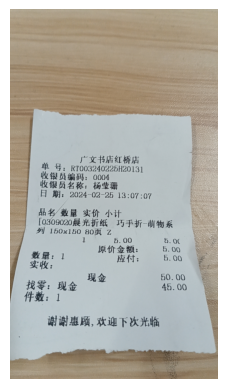

In [2]:
import cv2
import matplotlib.pyplot as plt

image_path = '/data/ephemeral/home/level2-cv-datacentric-cv-01/data/chinese_receipt/img/train/extractor.zh.in_house.appen_000008_page0001.jpg'  # 불러올 이미지 경로
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.show()

### saltandpepper

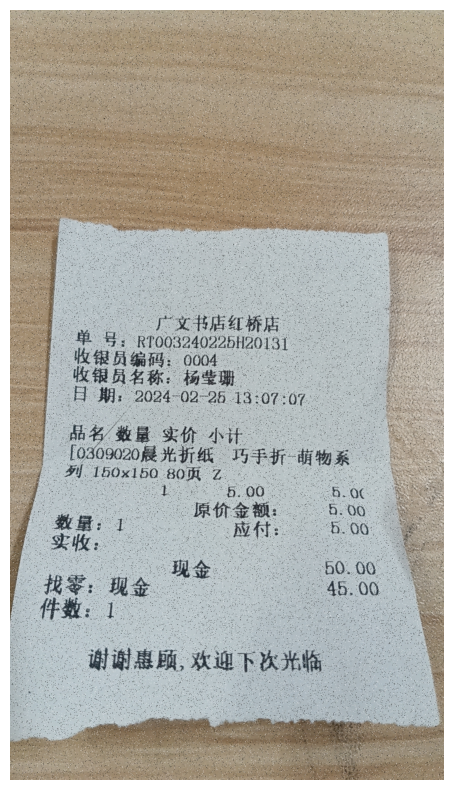

In [5]:
class SaltAndPepperNoise(A.ImageOnlyTransform):
    def __init__(self, salt_prob=0.02, pepper_prob=0.02, always_apply=False, p=0.5):
        super(SaltAndPepperNoise, self).__init__(always_apply=always_apply, p=p)
        self.salt_prob = salt_prob
        self.pepper_prob = pepper_prob

    def apply(self, img, **params):
        salt_pepper = np.random.rand(*img.shape[:2])
        img[salt_pepper < self.salt_prob] = 255  # Salt
        img[salt_pepper > 1 - self.pepper_prob] = 0  # Pepper
        return img

transform = A.Compose([
    SaltAndPepperNoise(salt_prob=0.02, pepper_prob=0.02)
])

transformed = transform(image=image)
transformed_image = transformed['image']

plt.figure(figsize=(10, 10))
plt.imshow(transformed_image)
plt.axis('off')
plt.show()

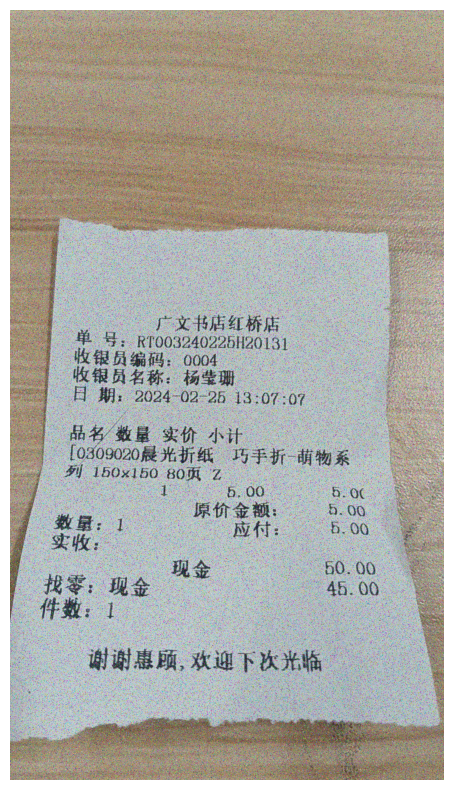

In [9]:
from skimage import io, util
import matplotlib.pyplot as plt

image_path = '/data/ephemeral/home/level2-cv-datacentric-cv-01/data/chinese_receipt/img/train/extractor.zh.in_house.appen_000008_page0001.jpg'
image = io.imread(image_path)

noisy_image = util.random_noise(image, mode='s&p', amount=0.09)  # amount: 노이즈의 강도

plt.figure(figsize=(10, 10))
plt.imshow(noisy_image)
plt.axis('off')
plt.show()

### canny

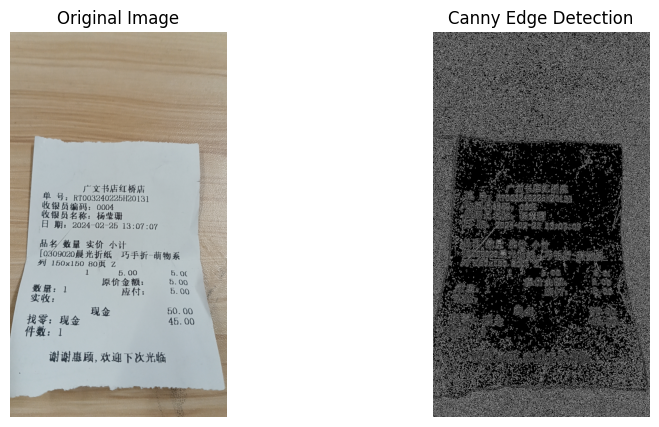

In [ ]:
edges = cv2.Canny(image, threshold1=10, threshold2=20)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()

### binarization

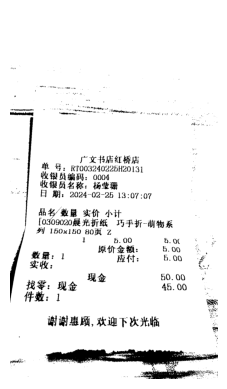

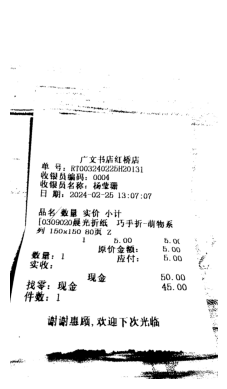

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path = '/data/ephemeral/home/level2-cv-datacentric-cv-01/data/chinese_receipt/img/train/extractor.zh.in_house.appen_000008_page0001.jpg'  # 불러올 이미지 경로
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
image = np.stack([binary_image] * 3, axis=-1)

plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(image)
plt.axis('off')
plt.show()

### binarization - adaptive threshold

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

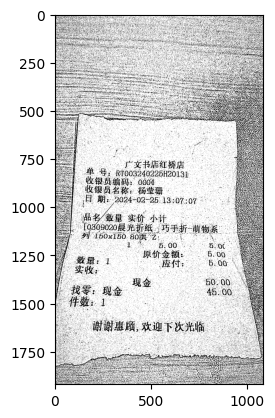

In [17]:
image_path = '/data/ephemeral/home/level2-cv-datacentric-cv-01/data/chinese_receipt/img/train/extractor.zh.in_house.appen_000008_page0001.jpg'  # 불러올 이미지 경로
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

adaptive_threshold = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
# adaptive_threshold = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

plt.imshow(adaptive_threshold, cmap='gray')

In [2]:
binary_image.shape

(1920, 1080)

In [5]:
image.shape

(1920, 1080, 3)